In [1]:
epochs = 20
batch_size = 512
lr = 1e-3

In [2]:
import tensorflow as tf
import numpy as np
# num_words=10000 only keep the top 10,000 most frequently occurring words in the data
(x_train, y_train_cls), (x_test, y_test_cls) = tf.keras.datasets.reuters.load_data(num_words=10000)
y_train_cls = y_train_cls.astype(np.int32)
y_test_cls = y_test_cls.astype(np.int32)
word2int = tf.keras.datasets.reuters.get_word_index(path='reuters_word_index.json')
int2word = dict([(value, key) for (key, value) in word2int.items()])
print(x_train.shape, y_train_cls.shape, x_test.shape, y_test_cls.shape)

(8982,) (8982,) (2246,) (2246,)


In [3]:
# We decode the review; note that our indices were offset by 3 because
# 0 - "padding"
# 1 - "start of sequence"
# 2 - "unknown".
print(x_train[0])
print(' '.join([int2word.get(i - 3, '?') for i in x_train[0]]))
print(y_train_cls[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3
3


In [4]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  
    return results
x_train = vectorize_sequences(x_train) 
x_test = vectorize_sequences(x_test) 
print(x_train.shape, y_train_cls.shape, x_test.shape, y_test_cls.shape)

(8982, 10000) (8982,) (2246, 10000) (2246,)


In [5]:
y_train = np.squeeze(np.eye(46)[y_train_cls]).astype(np.int32)
y_test = np.squeeze(np.eye(46)[y_test_cls]).astype(np.int32)
print(x_train.shape, y_train.shape, y_train_cls.shape, x_test.shape, y_test.shape, y_test_cls.shape)

(8982, 10000) (8982, 46) (8982,) (2246, 10000) (2246, 46) (2246,)


In [6]:
tf.reset_default_graph()
tf.set_random_seed(0)
np.random.seed(0)

In [7]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Using TensorFlow backend.


Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 0s 62us/step - loss: 0.1104 - accuracy: 0.9579 - val_loss: 1.0898 - val_accuracy: 0.8100
Epoch 2/20
7982/7982 [==============================] - 1s 66us/step - loss: 0.1086 - accuracy: 0.9563 - val_loss: 1.1395 - val_accuracy: 0.7870
Epoch 3/20
7982/7982 [==============================] - 1s 72us/step - loss: 0.1045 - accuracy: 0.9573 - val_loss: 1.1796 - val_accuracy: 0.7910
Epoch 4/20
7982/7982 [==============================] - 1s 63us/step - loss: 0.1075 - accuracy: 0.9574 - val_loss: 1.1783 - val_accuracy: 0.7840
Epoch 5/20
7982/7982 [==============================] - 1s 63us/step - loss: 0.1004 - accuracy: 0.9590 - val_loss: 1.1526 - val_accuracy: 0.8070
Epoch 6/20
7982/7982 [==============================] - 1s 63us/step - loss: 0.1001 - accuracy: 0.9600 - val_loss: 1.1670 - val_accuracy: 0.7970
Epoch 7/20
7982/7982 [==============================] - 1s 63us/step - loss: 0.100

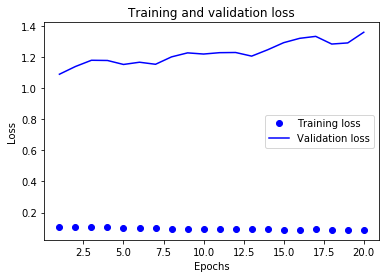

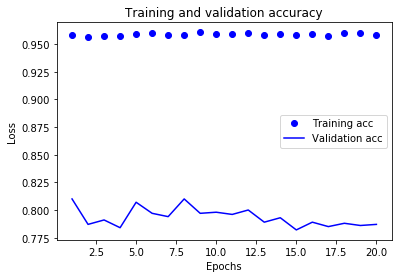

In [10]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.clf()   # clear figure
acc_values = history.history['accuracy']
val_acc_values = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [11]:
results = model.evaluate(x_test, y_test)
print(results)

2246/2246 [==============================] - 0s 82us/step
[1.5643183923892856, 0.7720391750335693]


In [12]:
model.predict(x_test)

array([[1.3115717e-06, 1.2434984e-07, 9.8774109e-09, ..., 1.1082022e-09,
        3.9986768e-12, 1.7526605e-11],
       [3.9453840e-05, 1.6799191e-03, 1.0268864e-05, ..., 9.6372041e-14,
        3.6222242e-15, 2.2105787e-12],
       [1.7041330e-03, 9.6161479e-01, 5.3305100e-03, ..., 8.7664830e-08,
        2.4359530e-08, 5.1382849e-05],
       ...,
       [7.3972892e-08, 4.4841099e-07, 6.4668029e-08, ..., 2.0089753e-10,
        5.4960554e-12, 3.4943154e-10],
       [1.5493648e-03, 6.9649644e-02, 5.2445108e-04, ..., 3.5931545e-05,
        1.9358813e-06, 1.6599832e-06],
       [4.9864146e-05, 9.9083334e-01, 7.6840888e-04, ..., 8.7326040e-09,
        9.3228245e-11, 6.1907912e-07]], dtype=float32)